## 1

In [3]:
def merge(l1, l2):
    pointer1 = 0
    pointer2 = 0
    merged = []
    while pointer1 < len(l1) and pointer2 < len(l2):
        if l1[pointer1] < l2[pointer2]:
            merged.append(l1[pointer1])
            pointer1 += 1
        else:
            merged.append(l2[pointer2])
            pointer2 += 1
    merged.extend(l1[pointer1:])
    merged.extend(l2[pointer2:])
    return merged

merge([1, 3, 5], [2, 4, 6])

[1, 2, 3, 4, 5, 6]

## 2

In [4]:
def binomial(n, k):
    if k == 0 or k == n:
        return 1
    return binomial(n-1, k-1) + binomial(n-1, k)

binomial(5, 2)


10

## 3

In [5]:
x = [1, 2, 3, 4, 5]

def f(x):
    if len(x) == 0:
        return
    print(x[-1])
    f(x[:-1])

f(x)

5
4
3
2
1


The master theorem doesn't apply because it needs each task to be divided in size by a factor $b$, where $b$ doesn't depend on $n$. In this algorithm, the subtask has size $n-1$; that's not a constant reduction factor.

## 4

In [ ]:
def derive(x, order):
    h = 1e-3
    if order == 0:
        return x**x
    return (derive(x+h, order-1) - derive(x-h, order-1)) / (2*h)

derive(x=1, order=3)

3.0000049805467555

## 5

In [8]:
import numpy as np

def split(matrix):
    """Split a matrix into quarters."""
    n = len(matrix)
    mid = n // 2
    return (matrix[:mid, :mid],
            matrix[:mid, mid:],
            matrix[mid:, :mid],
            matrix[mid:, mid:])

def strassen(A, B):
    n = len(A)
    
    # Base case: 1x1 matrix, return scalar product
    if n == 1:
        return A * B

    A11, A12, A21, A22 = split(A)
    B11, B12, B21, B22 = split(B)

    M1 = strassen(A11 + A22, B11 + B22)
    M2 = strassen(A21 + A22, B11)
    M3 = strassen(A11, B12 - B22)
    M4 = strassen(A22, B21 - B11)
    M5 = strassen(A11 + A12, B22)
    M6 = strassen(A21 - A11, B11 + B12)
    M7 = strassen(A12 - A22, B21 + B22)

    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6

    # Combine submatrices into one
    top = np.hstack((C11, C12))
    bottom = np.hstack((C21, C22))
    C = np.vstack((top, bottom))

    return C

A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

print('Using numpy:')
print(A @ B)
print()
print('Using Strassen:')
print(strassen(A, B))

Using numpy:
[[19 22]
 [43 50]]

Using Strassen:
[[19 22]
 [43 50]]


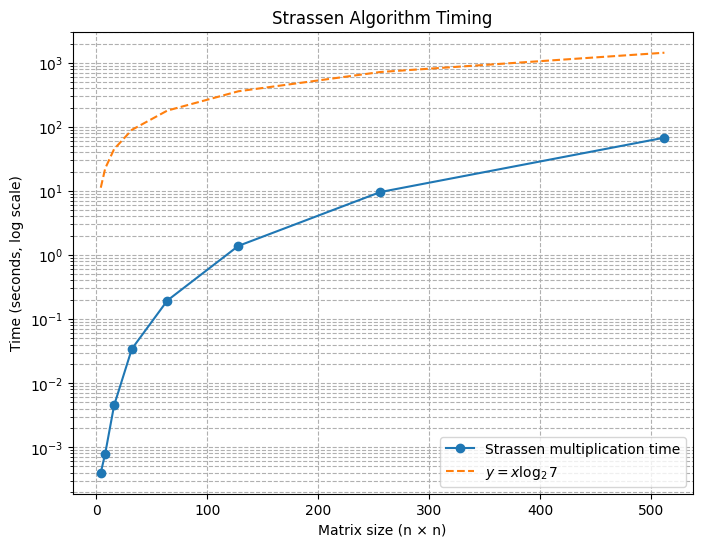

In [ ]:
import time
import matplotlib.pyplot as plt

sizes = [4, 8, 16, 32, 64, 128, 256, 512]
times = []

for n in sizes:
    A = np.random.rand(n, n)
    B = np.random.rand(n, n)
    start = time.time()
    strassen(A, B)
    end = time.time()
    times.append(end - start)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(sizes, times, 'o-', label='Strassen multiplication time')
plt.plot(sizes, [n * np.log2(7) for n in sizes], '--', label=r'$y = x \log_2 7$')
plt.yscale('log')
plt.xlabel('Matrix size (n × n)')
plt.ylabel('Time (seconds, log scale)')
plt.title('Strassen Algorithm Timing')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()